In [2]:
# Remember to update your path
%load_ext autoreload
%autoreload 2

import sys
from datetime import date
sys.path.append('/home/runmin/Documents/Qishi/QishiQR')

from pathlib import Path

from Backtesting.Vectorized.cross_compare import *
from Backtesting.Vectorized.models import *

from Utils.lm import gen_strategy, LM_model
from Utils.MajorContract_split import MajorContracts

import json
import warnings
warnings.filterwarnings(action='ignore')

# ====== Initial Configuration ========

try:
    with open('../config.json','r') as f:
        config = json.load(f)
except:
    print("Failed to find the configuration file.")
        
DATA_DIR = config['Tick path']
OUTPUT_DIR = config['Output path']
Strategy_DIR = config['Strategy path']
Major_DIR = config['Major path']
model_order = config['Max model order']
number_of_states = config['State number']
freq = config['Frequency']
offset = config['Offset']
tca = None

# Bu
## Build time series of Major contracts

In [3]:
start = date(2016, 6, 1)
end = date(2016, 10, 1)

start_dates = []
split_dates = []
end_dates = []

dt = start
while dt <= end:
    start_dates.append(dt.strftime("%Y%m%d"))
    split_dates.append(date(dt.year, dt.month+1, 1).isoformat())
    end_dates.append(date(dt.year, dt.month+2, 1).strftime("%Y%m%d"))
    dt = date(dt.year, dt.month+1, 1)

    
print(start_dates)
print(split_dates)
print(end_dates)

['20160601', '20160701', '20160801', '20160901', '20161001']
['2016-07-01', '2016-08-01', '2016-09-01', '2016-10-01', '2016-11-01']
['20160801', '20160901', '20161001', '20161101', '20161201']


## Calculate time series

bu1606 /home/runmin/Documents/Qishi/tick2016/bu
0
ID trade_range transition_begin transition_end
1606 ['2015-11-1', '2016-5-1'] 2016-01-01 00:00:00 2016-03-01 00:00:00
probability table:  20160104.0 20160229.0
bu1609 /home/runmin/Documents/Qishi/tick2016/bu
0
ID trade_range transition_begin transition_end
1609 ['2016-2-1', '2016-8-1'] 2016-03-01 00:00:00 2016-07-01 00:00:00
probability table:  20160229.0 20160630.0
bu1612 /home/runmin/Documents/Qishi/tick2016/bu
0
ID trade_range transition_begin transition_end
1612 ['2016-6-1', '2016-11-15'] 2016-07-01 00:00:00 2016-11-01 00:00:00
bu1706 /home/runmin/Documents/Qishi/tick2016/bu
0
ID trade_range transition_begin transition_end
1706 ['2016-10-15', '2017-1-31'] 2016-11-01 00:00:00 2016-12-31 00:00:00


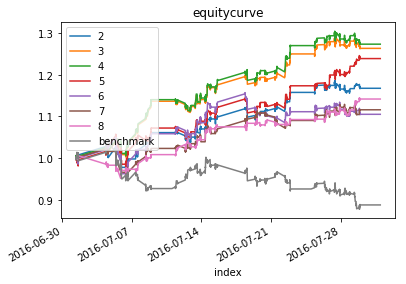

bu1606 /home/runmin/Documents/Qishi/tick2016/bu
0
ID trade_range transition_begin transition_end
1606 ['2015-11-1', '2016-5-1'] 2016-01-01 00:00:00 2016-03-01 00:00:00
probability table:  20160104.0 20160229.0
bu1609 /home/runmin/Documents/Qishi/tick2016/bu
0
ID trade_range transition_begin transition_end
1609 ['2016-2-1', '2016-8-1'] 2016-03-01 00:00:00 2016-07-01 00:00:00
probability table:  20160229.0 20160630.0
bu1612 /home/runmin/Documents/Qishi/tick2016/bu
0
ID trade_range transition_begin transition_end
1612 ['2016-6-1', '2016-11-15'] 2016-07-01 00:00:00 2016-11-01 00:00:00
probability table:  20160701.0 20160729.0
bu1706 /home/runmin/Documents/Qishi/tick2016/bu
0
ID trade_range transition_begin transition_end
1706 ['2016-10-15', '2017-1-31'] 2016-11-01 00:00:00 2016-12-31 00:00:00


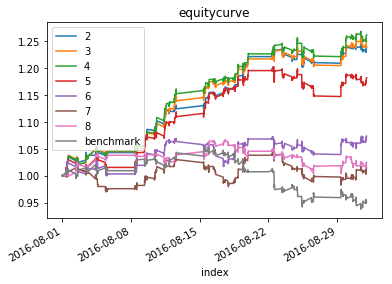

bu1606 /home/runmin/Documents/Qishi/tick2016/bu
0
ID trade_range transition_begin transition_end
1606 ['2015-11-1', '2016-5-1'] 2016-01-01 00:00:00 2016-03-01 00:00:00
probability table:  20160104.0 20160229.0
bu1609 /home/runmin/Documents/Qishi/tick2016/bu
0
ID trade_range transition_begin transition_end
1609 ['2016-2-1', '2016-8-1'] 2016-03-01 00:00:00 2016-07-01 00:00:00
probability table:  20160229.0 20160630.0
bu1612 /home/runmin/Documents/Qishi/tick2016/bu
0
ID trade_range transition_begin transition_end
1612 ['2016-6-1', '2016-11-15'] 2016-07-01 00:00:00 2016-11-01 00:00:00
probability table:  20160701.0 20160831.0
bu1706 /home/runmin/Documents/Qishi/tick2016/bu
0
ID trade_range transition_begin transition_end
1706 ['2016-10-15', '2017-1-31'] 2016-11-01 00:00:00 2016-12-31 00:00:00


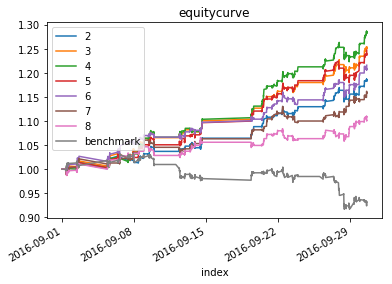

bu1606 /home/runmin/Documents/Qishi/tick2016/bu
0
ID trade_range transition_begin transition_end
1606 ['2015-11-1', '2016-5-1'] 2016-01-01 00:00:00 2016-03-01 00:00:00
probability table:  20160104.0 20160229.0
bu1609 /home/runmin/Documents/Qishi/tick2016/bu
0
ID trade_range transition_begin transition_end
1609 ['2016-2-1', '2016-8-1'] 2016-03-01 00:00:00 2016-07-01 00:00:00
probability table:  20160229.0 20160630.0
bu1612 /home/runmin/Documents/Qishi/tick2016/bu
0
ID trade_range transition_begin transition_end
1612 ['2016-6-1', '2016-11-15'] 2016-07-01 00:00:00 2016-11-01 00:00:00
probability table:  20160701.0 20160930.0
bu1706 /home/runmin/Documents/Qishi/tick2016/bu
0
ID trade_range transition_begin transition_end
1706 ['2016-10-15', '2017-1-31'] 2016-11-01 00:00:00 2016-12-31 00:00:00


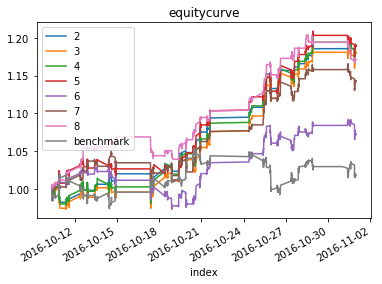

bu1606 /home/runmin/Documents/Qishi/tick2016/bu
0
ID trade_range transition_begin transition_end
1606 ['2015-11-1', '2016-5-1'] 2016-01-01 00:00:00 2016-03-01 00:00:00
probability table:  20160104.0 20160229.0
bu1609 /home/runmin/Documents/Qishi/tick2016/bu
0
ID trade_range transition_begin transition_end
1609 ['2016-2-1', '2016-8-1'] 2016-03-01 00:00:00 2016-07-01 00:00:00
probability table:  20160229.0 20160630.0
bu1612 /home/runmin/Documents/Qishi/tick2016/bu
0
ID trade_range transition_begin transition_end
1612 ['2016-6-1', '2016-11-15'] 2016-07-01 00:00:00 2016-11-01 00:00:00
probability table:  20160701.0 20161031.0
bu1706 /home/runmin/Documents/Qishi/tick2016/bu
0
ID trade_range transition_begin transition_end
1706 ['2016-10-15', '2017-1-31'] 2016-11-01 00:00:00 2016-12-31 00:00:00


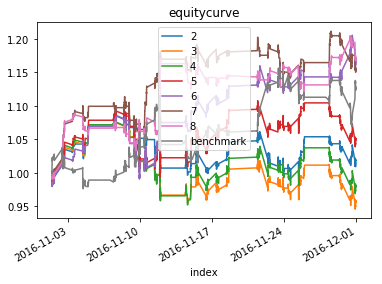

In [4]:
from Backtesting.Vectorized.models import MajorSeriesTest

Major_contracts = []
Train = []
Test = []
slm = []

Bu_result = []
for idx, _ in enumerate(start_dates):
    mj = MajorContracts(symbol='bu', split_time=split_dates[idx], topdir='/home/runmin/Documents/Qishi/tick2016', 
                           maturity={'1606':['2015-11-1','2016-5-1'], 
                                     '1609':['2016-2-1','2016-8-1'], 
                                     '1612':['2016-6-1','2016-11-15'],
                                     '1706':['2016-10-15','2017-1-31']}, 
                           transitions={'1606':'2016-3-1', '1609':'2016-7-1', '1612':'2016-11-1', '1706':'2017-1-1' },
                           freq=freq, offset=offset)
    
    mj_train, mj_test, ptb = mj.create_major_overlap()
    strategy = list(ptb.values())
    slm_tmp = pd.concat(strategy).groupby(['prior']).sum().reset_index()
    slm_tmp['signal'] = slm_tmp.loc[:, '0':'2'].idxmax(axis=1)

    start_tmp = start_dates[idx]
    end_tmp = end_dates[idx]
    max_order=7
    tcas = ['None']*max_order
    
    test = MajorSeriesTest(mj_test, OUTPUT_DIR, slm_tmp, px_th=0.0)
    test.build(max_order, offset, start_tmp, end_tmp, tcas)
    test.run()
    test.plot()
    test.results[0]['benchmark'].plot()
    
    Bu_result.append(test.results)
    
    plt.legend()
    plt.show()
    

In [6]:
Bu_concate_result = []

for prior_idx in range(0, 7):
    tmp = []
    for month_idx in range(0, 5):
        if month_idx == 0:
            tmp.append(Bu_result[month_idx][prior_idx].equitycurve)
        else:
            tmp.append(Bu_result[month_idx][prior_idx].equitycurve + tmp[-1][-1] - 1)
    Bu_concate_result.append(pd.concat(tmp))

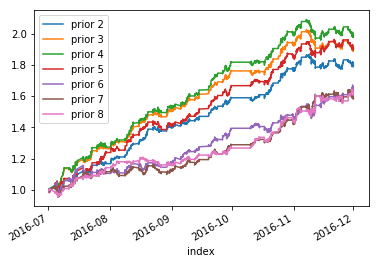

In [7]:
for idx, result in enumerate(Bu_concate_result):
    result.plot(label='prior {}'.format(idx+2))
plt.legend()